## $\textbf{Imports}$

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel

## $\textbf{Pure python function}$

In [76]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    
    for _ in range(nt):
        un[:] = u[:]
            
        for i in range(1, nx-1): 
            u[i] = un[i] + (nu * (dt / (dx**2))) * (un[i+1] -(2*un[i]) + un[i-1])
    
    return 0

## $\textbf{Numba Accelerator}$

In [77]:
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    
    for _ in range(nt):
        un[:] = u[:]
            
        for i in range(1, nx-1): 
            u[i] = un[i] + (nu * (dt / (dx**2))) * (un[i+1] -(2*un[i]) + un[i-1])
    
    return 0

## $\textbf{Pyccel Accelerator}$

In [78]:
def solve_1d_diff_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float', nu:'float'):
    
    for n_nt in range(nt):
        
        for iters in range(nx):
            un[iters] = u[iters]
            
        for i in range(1, nx-1):
            u[i] = un[i] + (nu * (dt / (dx**2))) * (un[i+1] -(2*un[i]) + un[i-1])
    
    return 0

## $\textbf{Inputs}$

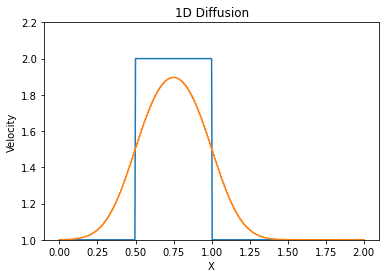

In [79]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 
plt.show()

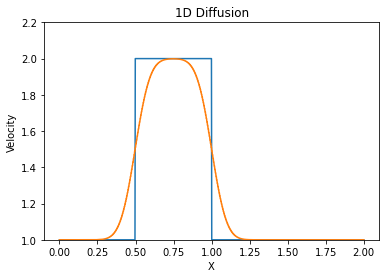

In [95]:
nx = 1000
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 
plt.show()

## $\textbf{Call Funtions}$

### $\textbf{Pure function}$

In [84]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

8.91 s ± 580 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### $\textbf{Function with numba accelerator}$

In [85]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

16.6 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### $\textbf{Function with pyccel accelerator}$

In [86]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [87]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

6.48 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Numba implementation runs faster than pure function implementation. Pyccel accelerator does better than both. From 501 to 1,000 samples, the diffusion is better represented with 1,000 samples.**